In [4]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [5]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('Train.csv')
dataset.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
median = dataset['Item_Weight'].median()
mode = dataset[dataset["Outlet_Size"]!="NaN"]["Outlet_Size"].mode()[0]

dataset['Item_Weight'].replace(np.nan,median,inplace=True)
dataset['Outlet_Size'].replace(np.nan,median,inplace=True)

In [7]:
# Finding Duplicated Data
import pandas as pd
dataset = pd.read_csv('Train.csv')

duplicate = dataset['Item_Type'].duplicated()
print(duplicate.sum())

8507


In [8]:
# Dropping The Duplicated Data
dataset.drop_duplicates(inplace=True)

In [9]:
# Checking The Duplicated Data Again
duplicate = dataset.duplicated()
print(duplicate.sum())
dataset[duplicate]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


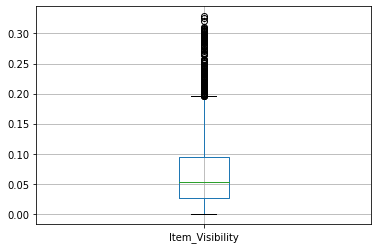

In [10]:
# Handling Outlier
import pandas as pd
dataset = pd.read_csv('Train.csv')

dataset.boxplot(column=["Item_Visibility"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


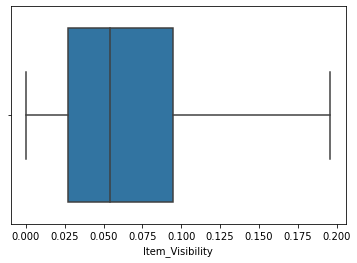

In [11]:
# Removing Outlier #ERROR
import seaborn as sns
import numpy as np
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lv = Q1-(1.5 * IQR)
  uv = Q3+(1.5 * IQR)
  return lv, uv
lv,uv = remove_outlier(dataset['Item_Visibility'])
dataset['Item_Visibility'] = np.where(dataset['Item_Visibility']>uv,uv,dataset['Item_Visibility'])
dataset['Item_Visibility'] = np.where(dataset['Item_Visibility']<lv,lv,dataset['Item_Visibility'])

sns.boxplot(dataset['Item_Visibility'])

In [12]:
# Correlation
dataset.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013568,0.027141,-0.011588,0.014123
Item_Visibility,-0.013568,1.000000,-0.001163,-0.064105,-0.117918
Item_MRP,0.027141,-0.001163,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.064105,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.117918,0.567574,-0.049135,1.000000


In [13]:
# Normalizing and Scaling
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [14]:
import pandas as pd
dataset = pd.read_csv('Train.csv')
dataset['Item_Weight'] = std_scale.fit_transform(dataset[['Item_Weight']])
dataset['Item_Visibility'] = std_scale.fit_transform(dataset[['Item_Visibility']])
dataset['Item_MRP'] = std_scale.fit_transform(dataset[['Item_MRP']])
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.766217,Low Fat,-0.970732,Dairy,1.747454,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,-1.494175,Regular,-0.908111,Soft Drinks,-1.489023,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,0.999834,Low Fat,-0.956917,Meat,0.010040,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,1.365966,Regular,-1.281758,Fruits and Vegetables,0.660050,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,-0.845905,Low Fat,-1.281758,Household,-1.399220,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


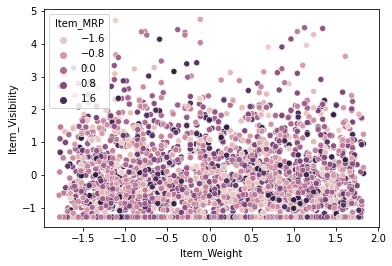

In [15]:
import pandas as pd
import seaborn as sns
sns.scatterplot(dataset['Item_Weight'],dataset['Item_Visibility'],dataset['Item_MRP'])